In [10]:
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 11.3 MB/s eta 0:00:0000:0100:01


In [22]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

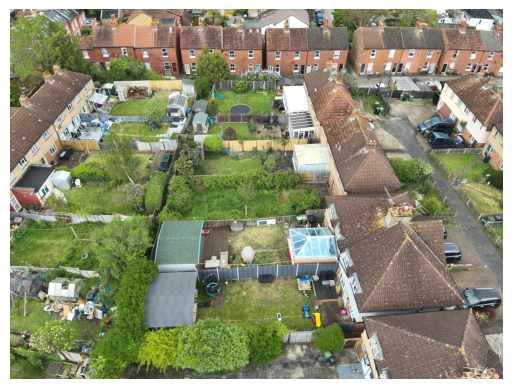

In [68]:
#SHOW ORIGINAL IMAGE

image_path = '/Users/tatianalupashina/Desktop/DJI_20230504183055_0150_V.JPG'

# Read the image file
img = cv2.imread(image_path)

# Check if the image was successfully read
if img is None:
    print(f"Failed to load image file: {image_path}")
else:
    # Convert BGR (OpenCV default) to RGB (for displaying with Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()


In [69]:
# Check if the file exists, IF YES THEN DECODE IT INTO TENSOR
if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
else:
    # Read the file contents as a string tensor
    image_string = tf.io.read_file(image_path)
    # Decode the JPEG image to a uint8 tensor
    decoded_image = tf.image.decode_jpeg(image_string, channels=3)
    # Print some information about the decoded image
    print(f"Image shape: {decoded_image.shape}")
    print(f"Image data type: {decoded_image.dtype}")

Image shape: (3000, 4000, 3)
Image data type: <dtype: 'uint8'>


In [65]:
# Get image dimensions
height, width, channels = img.shape

In [49]:
decoded_image[:,:,0]

<tf.Tensor: shape=(3000, 4000), dtype=uint8, numpy=
array([[191, 178, 139, ..., 108, 112, 111],
       [187, 166, 140, ..., 115, 113, 112],
       [176, 153, 149, ..., 117, 114, 112],
       ...,
       [118, 120, 110, ...,  83,  80,  78],
       [120, 121, 113, ...,  84,  81,  80],
       [120, 121, 117, ...,  81,  80,  85]], dtype=uint8)>

In [50]:
#PADDING

# Define padding
padding_amount = 70
paddings = tf.constant([[padding_amount, padding_amount], [padding_amount, padding_amount]])  # for height and width

# Initialize an empty list to store padded channels
padded_channels = []

# Loop through each channel and apply padding
for i in range(decoded_image.shape[2]):  # Loop through the 3 channels
    channel = decoded_image[:, :, i]  # Extract the i-th channel
    padded_channel = tf.pad(channel, paddings, "CONSTANT")  # Apply padding
    padded_channels.append(padded_channel)  # Add to list

# Stack the padded channels back together
padded_image = tf.stack(padded_channels, axis=2)

print(padded_image.shape)

(3140, 4140, 3)


In [64]:
padded_image[1000,:,:]

<tf.Tensor: shape=(4140, 3), dtype=uint8, numpy=
array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)>

In [66]:
#CONVERT PADDED TENSOR INTO JPEG IMAGE FILE

encoded_image = tf.io.encode_jpeg(padded_image)

# Specify the output path
output_dir = 'output_directory'
output_file = 'output_image.jpg'
output_path = os.path.join(output_dir, output_file)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Write the JPEG image to a file
tf.io.write_file('output_image.jpg', encoded_image)

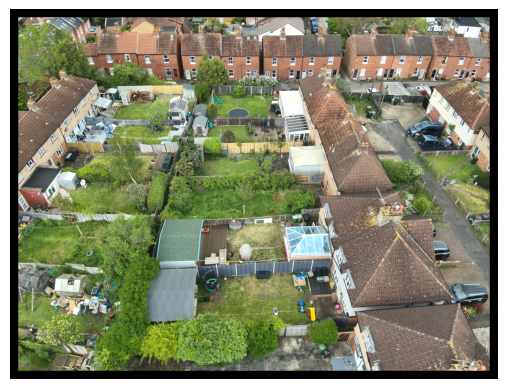

In [67]:
#SHOW CONVERTED IMAGE TO CHECK PADDING

output_image_path = '/Users/tatianalupashina/code/lupatat/tweloroject/output_image.jpg'

# Read the image file
img = cv2.imread(output_image_path)

# Check if the image was successfully read
if img is None:
    print(f"Failed to load image file: {image_path}")
else:
    # Convert BGR (OpenCV default) to RGB (for displaying with Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()